# Unitary:

## Ideal quantum circuit unitary simulator
References:
- https://qiskit.org/documentation/apidoc/providers_basicaer.html
- https://qiskit.org/documentation/stubs/qiskit.providers.basicaer.UnitarySimulatorPy.html#qiskit.providers.basicaer.UnitarySimulatorPy
- 
https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html

Unitary backend:https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

Different simulators:https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html

---

- It constructs a unitary matrix for quantum circuit
- This simulator creates 2^n X 2^n matrix for the gates in the quantum circuit
- Gate acting on the qubit is represented by a 2 X 2 unitary matrix

In [1]:
from qiskit import QuantumCircuit,BasicAer,Aer,transpile
from qiskit.visualization import *

import numpy as np
backend=Aer.get_backend('unitary_simulator')


In [2]:
qc=QuantumCircuit(1)
qc.draw(output="mpl")
job=backend.run(qc)
result=job.result()
I=result.get_unitary()
array_to_latex(I.data)

<IPython.core.display.Latex object>

## In this example: 1 -qubit and 1 gate  : H gate

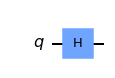

In [3]:
qc=QuantumCircuit(1)
qc.h(0)
qc.draw(output="mpl")

In [4]:
backend.name()

'unitary_simulator'

In [5]:
job=backend.run(qc)

In [6]:
result=job.result()

### get_unitary(): get the final unitary of the experiment

https://qiskit.org/documentation/stubs/qiskit.result.Result.get_unitary.html#qiskit.result.Result.get_unitary

---

In [7]:
unitary_matrix_Hgate=result.get_unitary()

In [8]:
unitary_matrix_Hgate

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))

In [9]:
# Get the raw data from the experiment

unitary_matrix_Hgate.data

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

In [10]:
type(unitary_matrix_Hgate.data)

numpy.ndarray

# Array to matrix visualization: 
### EX: array_to_latex(array)

Reference:
    https://qiskit.org/documentation/stubs/qiskit.visualization.array_to_latex.html#qiskit.visualization.array_to_latex
    
---

In [11]:
array_to_latex(unitary_matrix_Hgate.data)

<IPython.core.display.Latex object>

### We have obtain the unitary matrix for the H gate

# Let's find the unitary matrix for X gate

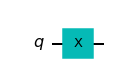

In [12]:
qc=QuantumCircuit(1)
qc.x(0)
qc.draw(output="mpl")

In [13]:
job=backend.run(qc)
result=job.result()
unitary_matrix_Xgate=result.get_unitary()
unitary_matrix_Xgate.data

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [14]:
array_to_latex(unitary_matrix_Xgate.data)

<IPython.core.display.Latex object>

# Let's take an example of 1 -qubit and 2 gates ( H and X)

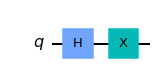

In [15]:
qc=QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.draw(output="mpl")

In [16]:
job=backend.run(qc)
result=job.result()
unitary_matrix=result.get_unitary()
unitary_matrix.data

array([[ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j]])

In [17]:
array_to_latex(unitary_matrix.data)

<IPython.core.display.Latex object>

# Unitary matrix for 1 qubit gate which has H-X

In [19]:
Hgate_U=unitary_matrix_Hgate.data
Xgate_U=unitary_matrix_Xgate.data


U=np.matmul(Xgate_U,Hgate_U)

array_to_latex(U)

<IPython.core.display.Latex object>

---
# Let's take a another example of 2 qubits and gates
---
- It should generate 2^n X 2^n= 4 X 4  unitary matrix to represent the gates in the quantum circuit

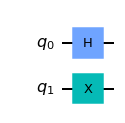

In [20]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw(output="mpl")

In [21]:
job=backend.run(qc)
result=job.result()
unitary_matrix=result.get_unitary()
unitary_matrix.data

array([[ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [-0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
        -0.        +0.00000000e+00j, -0.        +0.00000000e+00j]])

In [22]:
array_to_latex(unitary_matrix.data)

<IPython.core.display.Latex object>

### Imp: 
   - H gate is 2 X 2
   - X gate is 2 X 2  
   - The resultant matrix for the quantum circuit is 4 x 4

### Note: Let's take unitary matrix for H gate and X gate  and construct the unitary matrix for the above Quantum circuit to check how it's calculated.

In [23]:
Hgate_U=unitary_matrix_Hgate.data
Xgate_U=unitary_matrix_Xgate.data

print("Unitary Matrix for H gate :")
array_to_latex(Hgate_U)

Unitary Matrix for H gate :


<IPython.core.display.Latex object>

In [24]:
print("\nUnitary Matrix for X gate :")
array_to_latex(Xgate_U)


Unitary Matrix for X gate :


<IPython.core.display.Latex object>

# Unitary matrix is calculated by multiplying each gate matrix to an identity matrix

In [25]:

print("identity matrix :")
np.eye(2)

identity matrix :


array([[1., 0.],
       [0., 1.]])

In [26]:
array_to_latex(np.eye(2))

<IPython.core.display.Latex object>

### Identity matrix - kron- Hgate matrix

In [27]:
Hgate_U=np.kron(np.eye(2),unitary_matrix_Hgate.data)

print("Hgate unitary matrix:\n",Hgate_U,"\n")
array_to_latex(Hgate_U)


Hgate unitary matrix:
 [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j -0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j -0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]] 



<IPython.core.display.Latex object>

### Xgate matrix - kron- Identity matrix

In [28]:
Xgate_U=np.kron(unitary_matrix_Xgate.data,np.eye(2))

print("Xgate unitary matrix:\n",Xgate_U)

array_to_latex(Xgate_U)

Xgate unitary matrix:
 [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


<IPython.core.display.Latex object>

### Multiplying Hgate and Xgate

In [29]:
print( np.matmul(Hgate_U,Xgate_U) )

[[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


In [30]:
array_to_latex(np.matmul(Hgate_U,Xgate_U))

<IPython.core.display.Latex object>

Conclusion: Using the individual unitary matrix of H gate and X gate , we can see how a unitary matrix is calculated for a Quantum circuit which contains gate H on qubit0 and X qubit1

# IMP Note:

### Unitary simulator cannot have reset or measurement as instructions.
### It will throw QiskitError

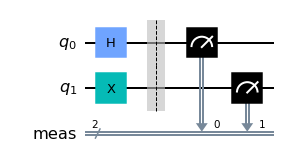

In [31]:
qc=QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.measure_all()
qc.draw(output="mpl")

In [32]:
job=backend.run(qc)
result=job.result()
unitary_matrix=result.get_unitary()
unitary_matrix.data

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit circuit-8 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.


QiskitError: 'ERROR:  [Experiment 0] Circuit circuit-8 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method. ,  ERROR: Circuit circuit-8 contains invalid instructions {"instructions": {save_unitary}} for "statevector" method.'